In [ ]:
import zipfile
import os

archivo_zip = 'archive.zip'

directorio_destino = 'Archivos'

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_destino)

archivos_descomprimidos = os.listdir(directorio_destino)

BadZipFile: ignored

#Descomprimir .zip
Hace que todos los archivos y carpetas contenidos en 'archive.zip' se descomprimirán en el directorio 'Archivos'

Importa el módulo zipfile y el módulo os para trabajar con archivos ZIP y el sistema de archivos, respectivamente.

Define el nombre del archivo ZIP que deseas descomprimir como 'archive.zip'.

Especifica el directorio de destino donde deseas que se descompriman los archivos, en este caso, 'Archivos'.

Utiliza un bloque with para abrir el archivo ZIP en modo lectura ('r') como zip_ref.

Luego, utiliza zip_ref.extractall(directorio_destino) para extraer todo el contenido del archivo ZIP en el directorio de destino especificado. Esto descomprime todos los archivos y subdirectorios contenidos en el archivo ZIP.

Finalmente, utiliza os.listdir(directorio_destino) para listar los archivos descomprimidos en el directorio de destino. La lista de archivos descomprimidos se almacena en la variable archivos_descomprimidos.

#Unzip .zip
This will cause all files and folders contained in 'archive.zip' to be unzipped into the 'Archivos' directory.

Import the zipfile module and the os module to work with ZIP files and the file system, respectively.

Define the name of the ZIP file you want to unzip as 'archive.zip'.

Specify the destination directory where you want the files to be unzipped, in this case, 'Archivos'.

Use a with block to open the ZIP file in read mode ('r') as zip_ref.

Then, use zip_ref.extractall(destination_directory) to extract all the contents of the ZIP file into the specified destination directory. This unzips all files and subdirectories contained in the ZIP file.

Finally, use os.listdir(destination_directory) to list the unzipped files in the destination directory. The list of unzipped files is stored in the variable unzipped_files.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/content/Archivos/DATASET'):
        print(dirname)

/content/Archivos/DATASET
/content/Archivos/DATASET/TEST
/content/Archivos/DATASET/TEST/O
/content/Archivos/DATASET/TEST/R
/content/Archivos/DATASET/TRAIN
/content/Archivos/DATASET/TRAIN/O
/content/Archivos/DATASET/TRAIN/R


#ImportaR bibliotecas:

numpy y pandas para el manejo de datos.
matplotlib.pyplot para la generación de gráficos.
tqdm para mostrar barras de progreso al procesar elementos en un bucle.
cv2 (OpenCV) para el procesamiento de imágenes.
warnings para manejar las advertencias.
os para interactuar con el sistema de archivos.
Se silencian las advertencias para evitar que se muestren durante la ejecución del código.

El bucle for recorre el contenido del directorio /content/Archivos/DATASET utilizando os.walk(). os.walk() es una función que recorre un directorio y sus subdirectorios, devolviendo una tupla que contiene la ruta del directorio actual, una lista de subdirectorios y una lista de nombres de archivos en el directorio actual. En este caso, solo se utiliza dirname (la ruta del directorio actual) y se ignora la información sobre subdirectorios y archivos.

En cada iteración del bucle, se imprime la ruta del directorio (dirname). Esto se hace para mostrar la estructura de directorios y subdirectorios dentro de /content/Archivos/DATASET.

#Import Libraries:
numpy and pandas for data handling.
matplotlib.pyplot for generating graphs.
tqdm for displaying progress bars when processing elements in a loop.
cv2 (OpenCV) for image processing.
warnings to handle warnings.
os to interact with the file system.
Warnings are silenced to prevent them from displaying during code execution.
The for loop iterates through the contents of the directory /content/Archivos/DATASET using os.walk(). os.walk() is a function that traverses a directory and its subdirectories, returning a tuple that contains the path of the current directory, a list of subdirectories, and a list of filenames in the current directory. In this case, only dirname (the path of the current directory) is used, and the information about subdirectories and files is ignored.

In each iteration of the loop, the directory path (dirname) is printed. This is done to display the directory and subdirectory structure within /content/Archivos/DATASET.




In [ ]:
train_path = "/content/Archivos/DATASET/TRAIN"
test_path = "/content/Archivos/DATASET/TEST"



*   train_path apunta al directorio que contiene los datos de entrenamiento.
*   test_path apunta al directorio que contiene los datos de prueba.



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

#importacion de librerias
Sequential: Importa la clase Sequential de Keras, que se utiliza para construir modelos de redes neuronales secuenciales capa por capa.

Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization: Importa las capas y funciones necesarias para construir una red neuronal convolucional (CNN). Estas capas se utilizan para diseñar la arquitectura de la red.

ImageDataGenerator, img_to_array, load_img: Importa clases y funciones relacionadas con la carga y procesamiento de imágenes. ImageDataGenerator se utiliza para generar lotes de datos de imagen aumentada, mientras que img_to_array y load_img se utilizan para convertir imágenes en arreglos y cargar imágenes, respectivamente.

plot_model: Importa la función plot_model de TensorFlow para visualizar la arquitectura del modelo.

glob: Importa la función glob, que se utiliza para buscar rutas de archivos y directorios que coincidan con un patrón de búsqueda. Puede ser útil para acceder a archivos en el sistema de archivos.

#Library Import
Sequential: Imports the Sequential class from Keras, which is used to build sequential neural network models layer by layer.

Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization: Imports the necessary layers and functions to construct a Convolutional Neural Network (CNN). These layers are used to design the architecture of the network.

ImageDataGenerator, img_to_array, load_img: Imports classes and functions related to loading and processing images. ImageDataGenerator is used to generate batches of augmented image data, while img_to_array and load_img are used for converting images to arrays and loading images, respectively.

plot_model: Imports the plot_model function from TensorFlow to visualize the model's architecture.

glob: Imports the glob function, which is used to search for file and directory paths that match a search pattern. It can be useful for accessing files in the file system.

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [00:09<00:00, 1083.05it/s]


#Creación del dataframe
 Este código carga imágenes desde un directorio de entrenamiento, las convierte a RGB, y crea un DataFrame que relaciona cada imagen con su etiqueta. Este DataFrame puede ser útil para preparar los datos para el entrenamiento de un modelo de aprendizaje automático, como una red neuronal convolucional (CNN).
 Se crean dos listas vacías, x_data y y_data, que se utilizarán para almacenar las imágenes y las etiquetas correspondientes.

Se inicia un bucle for que recorre las carpetas dentro del directorio de entrenamiento especificado en train_path. Cada carpeta dentro de train_path generalmente representa una categoría de imágenes.

Dentro del bucle exterior, se inicia otro bucle for que recorre los archivos de imágenes en cada carpeta de categoría. Esto se hace utilizando glob(category+'/*'), donde category es la ruta de la carpeta de categoría actual.

Para cada archivo de imagen encontrado, se utiliza cv2.imread(file) para cargar la imagen en formato BGR (Blue, Green, Red).

Luego, se convierte la imagen de formato BGR a RGB utilizando cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB).

La imagen se agrega a la lista x_data, y la etiqueta de la categoría se agrega a la lista y_data. La etiqueta se extrae de la ruta del archivo utilizando category.split("/")[-1], donde se obtiene el último elemento de la ruta, que generalmente corresponde al nombre de la categoría.

Después de recorrer todas las imágenes en todas las categorías, se utiliza la información almacenada en las listas x_data y y_data para crear un DataFrame de pandas llamado data. Cada fila del DataFrame contiene una imagen en la columna 'image' y la etiqueta correspondiente en la columna 'label'.

#Creation of the DataFrame
This code loads images from a training directory, converts them to RGB, and creates a DataFrame that associates each image with its label. This DataFrame can be useful for preparing data for training a machine learning model, such as a Convolutional Neural Network (CNN).

Two empty lists, x_data and y_data, are created to store the images and their corresponding labels.

A for loop is initiated that iterates through the folders within the specified training directory in train_path. Each folder inside train_path typically represents a category of images.

Within the outer loop, another for loop is initiated that iterates through the image files in each category folder. This is done using glob(category+'/*'), where category is the path of the current category folder.

For each image file found, cv2.imread(file) is used to load the image in BGR (Blue, Green, Red) format.

Then, the image is converted from BGR format to RGB using cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB).

The image is added to the x_data list, and the category label is added to the y_data list. The label is extracted from the file path using category.split("/")[-1], where the last element of the path, typically corresponding to the category name, is obtained.

After iterating through all the images in all the categories, the information stored in the lists x_data and y_data is used to create a pandas DataFrame named data. Each row of the DataFrame contains an image in the 'image' column and the corresponding label in the 'label' column.

In [ ]:
data.shape

(22564, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

#Contador
Se utiliza la clase Counter del módulo collections para contar la frecuencia de valores en la lista y_data. y_data generalmente contiene las etiquetas o categorías de un conjunto de datos, y Counter te permite contar cuántas veces aparece cada etiqueta en la lista.

Importa la clase Counter desde el módulo collections.

Luego, utiliza Counter(y_data) para contar las frecuencias de cada valor en la lista y_data.

El resultado de Counter(y_data) es un objeto que muestra las frecuencias de cada etiqueta. Puedes acceder a estas frecuencias utilizando la etiqueta como clave. Por ejemplo, si tienes etiquetas como 'clase1', 'clase2', 'clase3', puedes ver cuántas veces aparece cada una de ellas.


# Counter
The Counter class from the collections module is used to count the frequency of values in the y_data list. y_data typically contains the labels or categories of a dataset, and Counter allows you to count how many times each label appears in the list.

Import the Counter class from the collections module.

Then, use Counter(y_data) to count the frequencies of each value in the y_data list.

The result of Counter(y_data) is an object that displays the frequencies of each label. You can access these frequencies by using the label as a key. For example, if you have labels like 'class1', 'class2', 'class3', you can see how many times each of them appears.

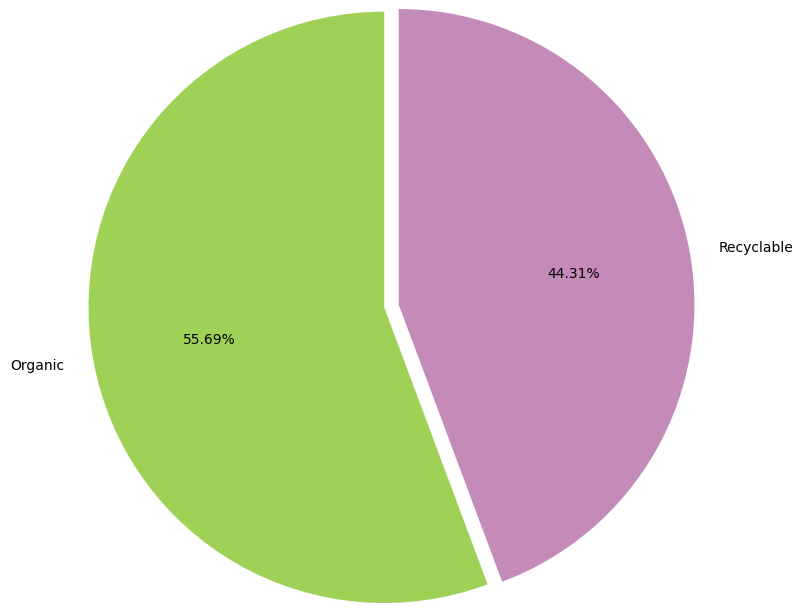

In [ ]:
colors = ['#a0d157', '#c48bb8']
labels = ['Organic', 'Recyclable']
plt.pie(data.label.value_counts(), startangle=90, explode=[0.05, 0.05], autopct='%0.2f%%',
        labels=labels, colors=colors, radius=2)
plt.show()


#Visualización
Este código crea un gráfico de pastel que representa la distribución de etiquetas en los datos, con etiquetas personalizadas y colores específicos para cada categoría.
colors y labels son listas que contienen colores y etiquetas respectivamente. Los colores se utilizan para resaltar las porciones del gráfico de pastel y las etiquetas se utilizan para identificar las categorías representadas en el gráfico.

plt.pie(data.label.value_counts(), startangle=90, explode=[0.05, 0.05], autopct='%0.2f%%', labels=labels, colors=colors, radius=2) crea el gráfico de pastel. Aquí están los detalles:

data.label.value_counts() calcula la frecuencia de cada etiqueta en la columna 'label' del DataFrame data.
startangle=90 define el ángulo inicial del gráfico de pastel como 90 grados, lo que rota la gráfica.
explode=[0.05, 0.05] hace que las porciones del gráfico se separen ligeramente de la circunferencia del pastel. Esto se logra especificando un valor de separación para cada porción en la lista explode.
autopct='%0.2f%%' muestra los porcentajes en las porciones del gráfico con dos decimales.
labels=labels establece las etiquetas en el gráfico, que son 'Organic' y 'Recyclable' en este caso.
colors=colors define los colores de las porciones del gráfico según las listas colors.
radius=2 establece el radio del gráfico de pastel en 2 unidades.
plt.show() muestra el gráfico de pastel en la salida de la celda.

# Visualization
This code creates a pie chart representing the distribution of labels in the data, with custom labels and specific colors for each category. Colors and labels are lists containing colors and labels respectively. The colors are used to highlight the portions of the pie chart, and the labels are used to identify the categories represented in the chart.

`plt.pie(data.label.value_counts(), startangle=90, explode=[0.05, 0.05], autopct='%0.2f%%', labels=labels, colors=colors, radius=2)` creates the pie chart. Here are the details:

- `data.label.value_counts()` calculates the frequency of each label in the 'label' column of the DataFrame data.
- `startangle=90` sets the starting angle of the pie chart to 90 degrees, which rotates the chart.
- `explode=[0.05, 0.05]` causes the portions of the chart to slightly separate from the circumference of the pie. This is achieved by specifying a separation value for each portion in the explode list.
- `autopct='%0.2f%%'` displays the percentages on the chart's portions with two decimals.
- `labels=labels` sets the labels on the chart, which are 'Organic' and 'Recyclable' in this case.
- `colors=colors` defines the colors of the chart's portions according to the colors list.
- `radius=2` sets the radius of the pie chart to 2 units.
- `plt.show()` displays the pie chart in the cell's output.

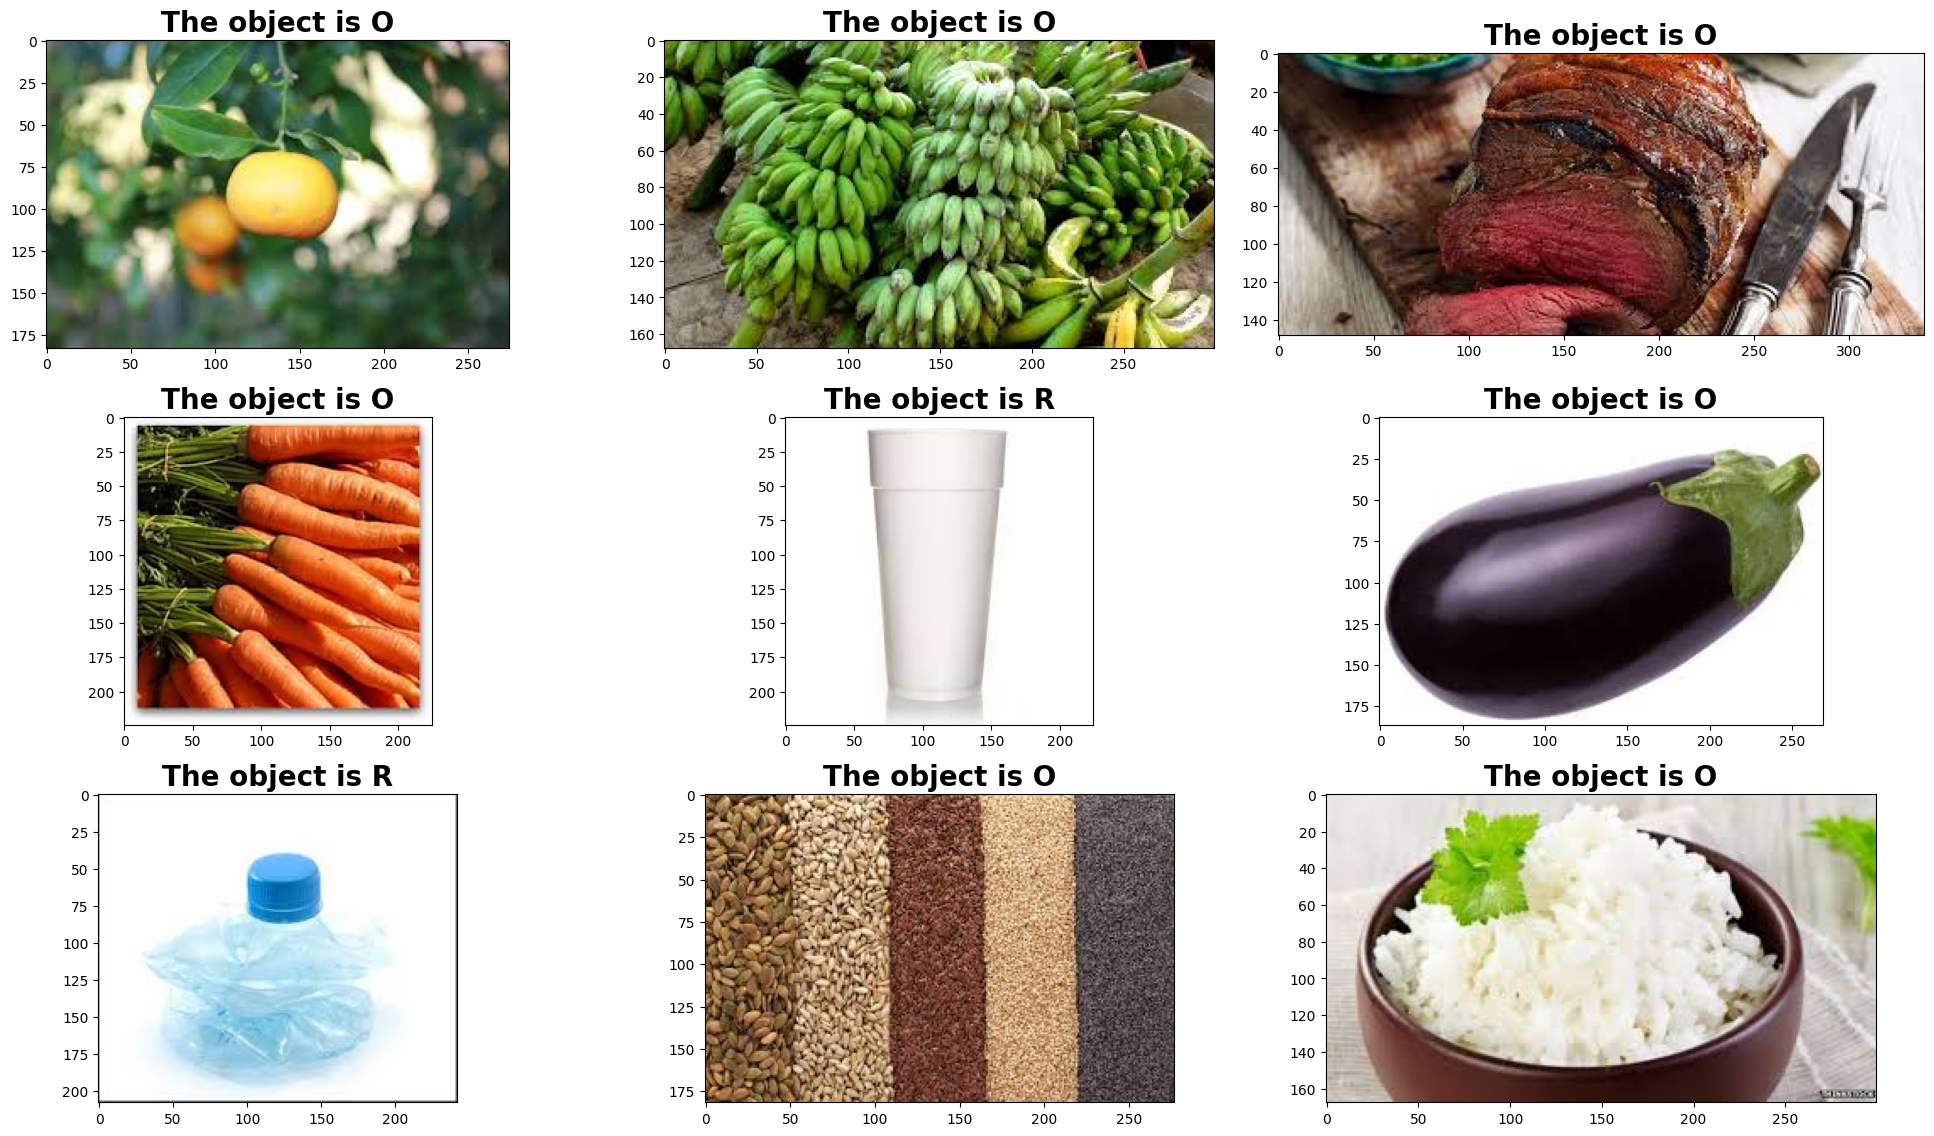

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('The object is {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()


* O -> Organic
*  R -> Recyclable

#Vizualisación de la clasificacion
Este código crea una figura de Matplotlib con 9 subgráficos, cada uno mostrando una imagen aleatoria de los datos junto con su etiqueta.
plt.figure(figsize=(20,15)) crea una figura de Matplotlib con un tamaño de 20 pulgadas de ancho y 15 pulgadas de alto.

Luego, se ejecuta un bucle for que itera 9 veces (definido por for i in range(9)), lo que significa que se crearán 9 subgráficos en total.

plt.subplot(4,3,(i%12)+1) crea un subgráfico en una cuadrícula de 4 filas y 3 columnas. (i%12)+1 se utiliza para asegurarse de que el índice de los subgráficos sea válido, incluso si el bucle supera 12 iteraciones. El índice empieza en 1 y aumenta en cada iteración.

index=np.random.randint(15000) selecciona un índice aleatorio dentro del rango de 0 a 14,999. Esto se utiliza para mostrar una imagen aleatoria de tus datos.

plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'}) agrega un título al subgráfico que indica la etiqueta de la imagen correspondiente. El título se muestra en negrita y con un tamaño de fuente de 20.

plt.imshow(data.image[index]) muestra la imagen correspondiente en el subgráfico.

plt.tight_layout() se utiliza para garantizar que los subgráficos estén bien ajustados y espaciados dentro de la figura.

#Visualization of Classification
This code creates a Matplotlib figure with 9 subplots, each displaying a random image from the data along with its label. plt.figure(figsize=(20,15)) creates a Matplotlib figure with a size of 20 inches wide and 15 inches tall.

Then, a for loop is executed that iterates 9 times (defined by for i in range(9)), meaning that a total of 9 subplots will be created.

plt.subplot(4,3,(i%12)+1) creates a subplot on a grid of 4 rows and 3 columns. (i%12)+1 is used to ensure the subplot index is valid, even if the loop exceeds 12 iterations. The index starts at 1 and increases with each iteration.

index=np.random.randint(15000) selects a random index within the range of 0 to 14,999. This is used to display a random image from your data.

plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'}) adds a title to the subplot indicating the label of the corresponding image. The title is displayed in bold and with a font size of 20.

plt.imshow(data.image[index]) displays the corresponding image in the subplot.

plt.tight_layout() is used to ensure that the subplots are well adjusted and spaced within the figure.

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


Este código se utiliza para contar y mostrar el número de clases (o categorías) presentes en los datos de entrenamiento.

className = glob(train_path + '/*'): Utiliza glob(train_path + '/*') para buscar todas las carpetas dentro del directorio de entrenamiento. Cada carpeta generalmente representa una clase o categoría de datos.

numberOfClass = len(className): Calcula la longitud de la lista className para determinar cuántas clases hay en tus datos. Esto te dará el número de clases distintas en tu conjunto de datos.

print("Number Of Class: ", numberOfClass): Imprime el número de clases en la salida. Esto proporcionará información sobre cuántas clases diferentes tienes en tus datos de entrenamiento.

En resumen, esta seccion del código se utiliza para contar y mostrar el número de clases (o categorías) presentes en tus datos de entrenamiento. Esto es útil para comprender la diversidad de clases en el conjunto de datos, lo cual es esencial en tareas de clasificación y análisis de datos.

--------------------------------------

This code is used to count and display the number of classes (or categories) present in the training data.

`className = glob(train_path + '/*')`: Uses `glob(train_path + '/*')` to search for all folders within the training directory. Each folder generally represents a class or category of data.

`numberOfClass = len(className)`: Calculates the length of the `className` list to determine how many classes there are in your data. This will give you the number of distinct classes in your dataset.

`print("Number Of Class: ", numberOfClass)`: Prints the number of classes in the output. This will provide information on how many different classes you have in your training data.

In summary, this section of the code is used to count and display the number of classes (or categories) present in your training data. This is useful for understanding the diversity of classes in the dataset, which is essential in classification tasks and data analysis.



In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256


#CNN
Este código define la arquitectura del modelo CNN para la tarea de clasificación y lo configura para el entrenamiento.

Se crea un objeto model de tipo Sequential, que es una forma de crear modelos de redes neuronales en Keras de manera secuencial, capa por capa.

Se añaden varias capas convolucionales (Conv2D) con activaciones ReLU (Rectified Linear Unit) y capas de Max Pooling (MaxPooling2D). Estas capas se utilizan para extraer características de las imágenes y reducir la dimensionalidad.

Luego, se agrega una capa de aplanamiento (Flatten) para convertir la salida de las capas convolucionales en un vector unidimensional.

Se añaden capas completamente conectadas (Dense) con activaciones ReLU y capas de Dropout. Estas capas se utilizan para realizar la clasificación de las características extraídas de las imágenes.

Finalmente, se añade una capa de salida con una activación "sigmoid" y el número de clases igual a la variable numberOfClass. Esto indica que estás realizando una tarea de clasificación binaria (cada clase representa una etiqueta y se utiliza la activación sigmoid) con un número de clases igual al número de clases en tu conjunto de datos.

El modelo se compila utilizando "binary_crossentropy" como función de pérdida, "adam" como optimizador y se utiliza "accuracy" como métrica para evaluar el rendimiento del modelo.

Se define el tamaño del lote (batch size) como 256 utilizando la variable batch_size. Esto controla cuántas muestras se procesan a la vez durante el entrenamiento del modelo.

# CNN
This code defines the architecture of the CNN model for the classification task and sets it up for training.

A `model` object of type `Sequential` is created, which is a way of building neural network models in Keras sequentially, layer by layer.

Several convolutional layers (`Conv2D`) with ReLU (Rectified Linear Unit) activations and Max Pooling layers (`MaxPooling2D`) are added. These layers are used to extract features from the images and reduce dimensionality.

Then, a Flatten layer is added to convert the output of the convolutional layers into a one-dimensional vector.

Fully connected layers (`Dense`) with ReLU activations and Dropout layers are added. These layers are used for classifying the extracted features from the images.

Finally, an output layer is added with a "sigmoid" activation and the number of classes equal to the `numberOfClass` variable. This indicates that you are performing a binary classification task (each class represents a label and sigmoid activation is used) with the number of classes equal to the number of classes in your dataset.

The model is compiled using "binary_crossentropy" as the loss function, "adam" as the optimizer, and "accuracy" as the metric to evaluate the model's performance.

The batch size is set to 256 using the `batch_size` variable. This controls how many samples are processed at once during the training of the model.

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

ImageDataGenerator es una herramienta poderosa que se utiliza para generar lotes de datos de imagen aumentada durante el entrenamiento de modelos de redes neuronales convolucionales (CNN). La operación de reescalamiento que has definido con rescale=1./255 es una práctica común para normalizar los valores de los píxeles de las imágenes en el rango [0, 1] dividiendo todos los valores de píxeles por 255. Esto ayuda a que el entrenamiento del modelo sea más eficiente.

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = 256,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = 256,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


#Generador de datos
train_generator y test_generator son generadores de datos de imagen que se crean utilizando train_datagen y test_datagen, que son instancias de ImageDataGenerator.

train_datagen.flow_from_directory se utiliza para cargar y generar lotes de datos de imagen desde el directorio de entrenamiento (train_path). Aquí están los detalles de sus parámetros:

train_path: Ruta al directorio de entrenamiento.
target_size: Tamaño al que se redimensionarán las imágenes de entrada (en este caso, 224x224 píxeles).
batch_size: Tamaño del lote, que se establece en batch_size.
color_mode: Modo de color de las imágenes (en este caso, "rgb").
class_mode: Modo de clasificación (en este caso, "categorical" para clasificación categórica).
test_datagen.flow_from_directory hace lo mismo que train_datagen.flow_from_directory, pero se aplica al directorio de prueba (test_path) en lugar del directorio de entrenamiento.

#Data Generator
train_generator and test_generator are image data generators created using train_datagen and test_datagen, which are instances of ImageDataGenerator.

train_datagen.flow_from_directory is used to load and generate batches of image data from the training directory (train_path). Here are the details of its parameters:

train_path: Path to the training directory.
target_size: Size to which the input images will be resized (in this case, 224x224 pixels).
batch_size: Batch size, which is set to batch_size.
color_mode: Color mode of the images (in this case, "rgb").
class_mode: Classification mode (in this case, "categorical" for categorical classification).
test_datagen.flow_from_directory does the same as train_datagen.flow_from_directory, but applies to the test directory (test_path) instead of the training directory.

In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=1,
        validation_data = test_generator)

89/89 [==============================] - 2432s 27s/step - loss: 0.5092 - accuracy: 0.7716 - val_loss: 0.3853 - val_accuracy: 0.8309


#Entrenamiento
El código ejecuta las epocas de entrenamiento y evalúa el modelo en el conjunto de validación después de cada época. El historial del entrenamiento se almacena en el objeto hist, lo que te permite acceder a la información sobre la precisión y la pérdida a lo largo de las épocas.

model.fit_generator: Este método se utiliza para entrenar un modelo de Keras utilizando generadores de datos, en lugar de matrices de datos fijas. Esto es útil cuando se trabaja con conjuntos de datos grandes que no caben en la memoria.

generator = train_generator: Se especifica el generador de datos train_generator como fuente de datos para el entrenamiento. Esto significa que el modelo utilizará lotes de datos generados por train_generator durante el entrenamiento.

epochs=1: El modelo se entrenará durante una época (una pasada completa por el conjunto de datos de entrenamiento). Puedes ajustar el número de épocas según tus necesidades. El entrenamiento se realiza durante una sola época en este caso.

validation_data = test_generator: Se especifica el generador de datos test_generator como conjunto de datos de validación. Durante el entrenamiento, el modelo evaluará su rendimiento en el conjunto de validación en cada época.

# Training
The code executes the training epochs and evaluates the model on the validation set after each epoch. The training history is stored in the `hist` object, allowing you to access information about accuracy and loss throughout the epochs.

`model.fit_generator`: This method is used to train a Keras model using data generators, instead of fixed data arrays. This is useful when working with large datasets that don't fit in memory.

`generator = train_generator`: The data generator `train_generator` is specified as the data source for training. This means that the model will use batches of data generated by `train_generator` during training.

`epochs=1`: The model will be trained for one epoch (a complete pass through the training dataset). You can adjust the number of epochs according to your needs. In this case, training is conducted for a single epoch.

`validation_data = test_generator`: The data generator `test_generator` is specified as the validation dataset. During training, the model will evaluate its performance on the validation set at the end of each epoch.# Training
The code executes the training epochs and evaluates the model on the validation set after each epoch. The training history is stored in the `hist` object, allowing you to access information about accuracy and loss throughout the epochs.

`model.fit_generator`: This method is used to train a Keras model using data generators, instead of fixed data arrays. This is useful when working with large datasets that don't fit in memory.

`generator = train_generator`: The data generator `train_generator` is specified as the data source for training. This means that the model will use batches of data generated by `train_generator` during training.

`epochs=1`: The model will be trained for one epoch (a complete pass through the training dataset). You can adjust the number of epochs according to your needs. In this case, training is conducted for a single epoch.

`validation_data = test_generator`: The data generator `test_generator` is specified as the validation dataset. During training, the model will evaluate its performance on the validation set at the end of each epoch.

The follwoing graphs are in charge of showing the evolution fo the learning process of the newral network. However, because the data set is computationally heavy, only one epoch was implemented.

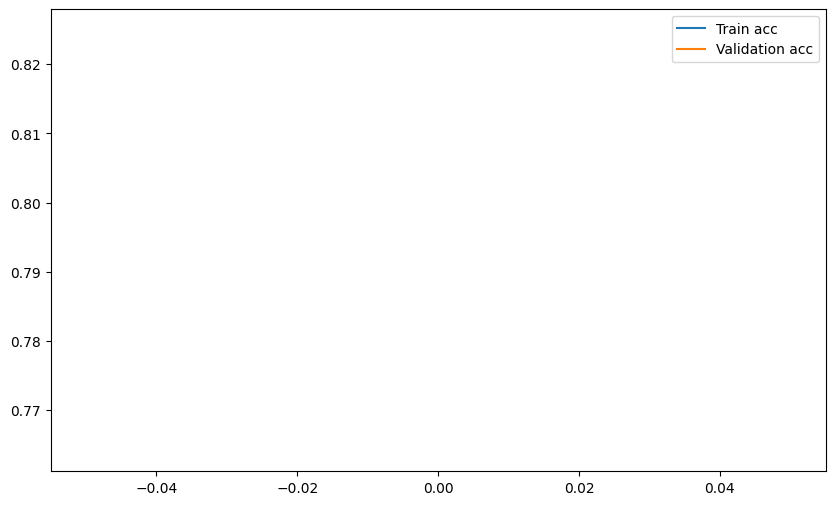

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

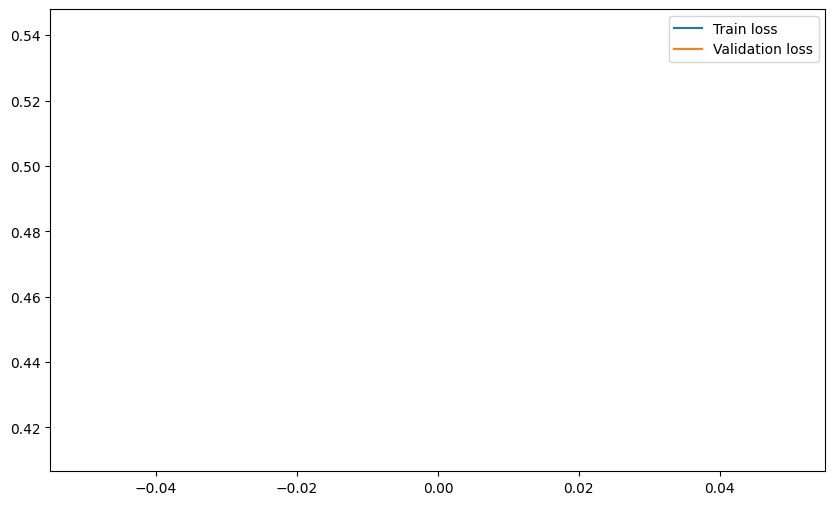

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

#Gráficas
 Este código crea una gráfica que compara la precisión del modelo en el conjunto de entrenamiento y en el conjunto de validación a lo largo de las épocas durante el entrenamiento. Esto te permite visualizar cómo se desempeña el modelo en ambos conjuntos y si hay signos de sobreajuste (overfitting) o subajuste (underfitting). La precisión en el conjunto de entrenamiento tiende a aumentar con el tiempo, mientras que la precisión en el conjunto de validación puede variar, lo que es útil para evaluar el rendimiento del modelo.

plt.figure(figsize=[10,6]) crea una figura de Matplotlib con un tamaño de 10 pulgadas de ancho y 6 pulgadas de alto, establecido mediante el argumento figsize.

plt.plot(hist.history["accuracy"], label="Train acc") traza la precisión (accuracy) en el conjunto de entrenamiento. hist.history["accuracy"] contiene los valores de precisión en el conjunto de entrenamiento en cada época durante el entrenamiento del modelo.

plt.plot(hist.history["val_accuracy"], label="Validation acc") traza la precisión en el conjunto de validación. hist.history["val_accuracy"] contiene los valores de precisión en el conjunto de validación en cada época durante el entrenamiento del modelo.

plt.legend() agrega una leyenda que indica qué línea corresponde a la precisión del conjunto de entrenamiento y cuál corresponde a la precisión del conjunto de validación.

plt.show() muestra la gráfica en la salida.

# Graphs
This code creates a graph comparing the accuracy of the model on the training set and the validation set over the epochs during training. This allows you to visualize how the model performs on both sets and whether there are signs of overfitting or underfitting. The accuracy on the training set tends to increase over time, while the accuracy on the validation set can vary, which is useful for evaluating the model's performance.

`plt.figure(figsize=[10,6])` creates a Matplotlib figure with a size of 10 inches wide and 6 inches tall, set by the `figsize` argument.

`plt.plot(hist.history["accuracy"], label="Train acc")` plots the accuracy on the training set. `hist.history["accuracy"]` contains the accuracy values on the training set at each epoch during the model's training.

`plt.plot(hist.history["val_accuracy"], label="Validation acc")` plots the accuracy on the validation set. `hist.history["val_accuracy"]` contains the accuracy values on the validation set at each epoch during the model's training.

`plt.legend()` adds a legend indicating which line corresponds to the training set accuracy and which corresponds to the validation set accuracy.

`plt.show()` displays the graph in the output.

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

#Modelo para predecir
plt.figure(figsize=(6,4)): Crea una figura de Matplotlib con un tamaño de 6 pulgadas de ancho y 4 pulgadas de alto.

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)): Muestra la imagen proporcionada en la figura. Antes de mostrarla, la función convierte la imagen de BGR a RGB utilizando cv2.cvtColor. Esto es importante porque Matplotlib espera imágenes en formato RGB.

plt.tight_layout(): Asegura que los elementos en la figura estén bien ajustados y espaciados.

img = cv2.resize(img, (224, 224)): Redimensiona la imagen a un tamaño de 224x224 píxeles. Esto es común en aplicaciones de visión por computadora, ya que muchos modelos de clasificación requieren imágenes de entrada de un tamaño específico.

img = np.reshape(img, [-1, 224, 224, 3]): Da forma a la imagen para que tenga una forma compatible con la entrada del modelo. La imagen se convierte en un tensor de rango 4 con forma (1, 224, 224, 3). El primer eje (1) se utiliza para representar el lote de imágenes.

result = np.argmax(model.predict(img)): Realiza una predicción utilizando el modelo proporcionado (model) y la imagen procesada. model.predict(img) devuelve las probabilidades de pertenencia de la imagen a cada clase. np.argmax se utiliza para encontrar la clase con la probabilidad más alta y asignarla a result.

Luego, la función verifica el valor de result para determinar la clase predicha y muestra un mensaje en función de la clase:

Si result es igual a 0, se muestra el mensaje "This image -> Recyclable".
Si result es igual a 1, se muestra el mensaje "This image -> Organic". Los mensajes se muestran en color azul ("\033[94m") para hacerlos más visibles.

1/1 [==============================] - 0s 198ms/step
This image -> Organic


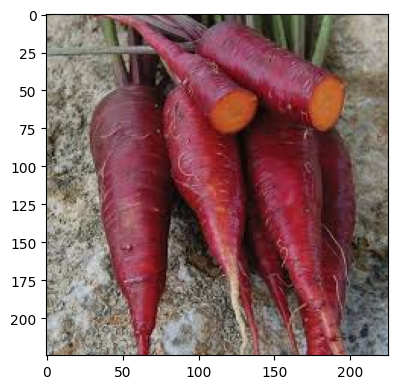

In [ ]:
test_img = cv2.imread("/content/Archivos/DATASET/TEST/O/O_12571.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 74ms/step
This image -> Recyclable


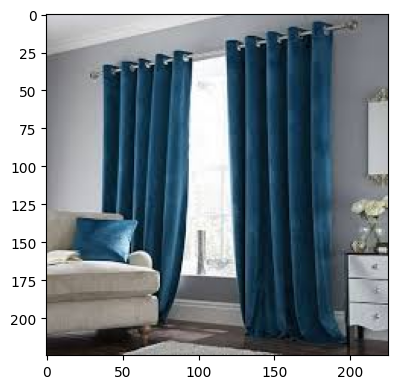

In [ ]:
test_img = cv2.imread("/content/Archivos/DATASET/TEST/R/R_10027.jpg")
predict_func(test_img)

#Predicción del modelo
La función predict_func mostrará la imagen cargada, realizará una predicción en función del modelo previamente definido y mostrará el resultado en la salida, indicando si la imagen se clasifica como "Recyclable" o "Organic". La clase predicha se basa en las probabilidades calculadas por el modelo.
test_img = cv2.imread("/content/Archivos/DATASET/TEST/R/R_10027.jpg"): Carga la imagen especificada en la variable test_img utilizando OpenCV. La ruta de la imagen corresponde a "/content/Archivos/DATASET/TEST/R/R_10027.jpg".

Luego, se llama a la función predict_func(test_img) para realizar una predicción en la imagen test_img. Esta función muestra la imagen, realiza la predicción y muestra el resultado en función de la clase predicha.


# Model Prediction
The `predict_func` function will display the loaded image, make a prediction based on the previously defined model, and show the result in the output, indicating whether the image is classified as "Recyclable" or "Organic". The predicted class is based on the probabilities calculated by the model.

`test_img = cv2.imread("/content/Archivos/DATASET/TEST/R/R_10027.jpg")`: Loads the specified image into the variable `test_img` using OpenCV. The image path corresponds to "/content/Archivos/DATASET/TEST/R/R_10027.jpg".

Then, the function `predict_func(test_img)` is called to perform a prediction on the `test_img`. This function displays the image, makes the prediction, and shows the result based on the predicted class.